pandas 실습

In [1]:
#1번 미션
import pandas as pd

dataset = pd.read_csv("NHIS_OPEN_GJ_2018_v1.csv", encoding='cp949')

print(dataset)

        기준년도  가입자일련번호  성별코드  ...  제3대구치(사랑니)이상   치석     데이터공개일자
0       2018        1     2  ...           NaN  NaN  2019-12-19
1       2018        2     1  ...           NaN    N  2019-12-19
2       2018        3     1  ...           NaN    N  2019-12-19
3       2018        4     2  ...           NaN    N  2019-12-19
4       2018        5     2  ...           NaN  NaN  2019-12-19
...      ...      ...   ...  ...           ...  ...         ...
238071  2018   238072     2  ...           NaN  NaN  2019-12-19
238072  2018   238073     1  ...           NaN  NaN  2019-12-19
238073  2018   238074     1  ...           NaN    Y  2019-12-19
238074  2018   238075     1  ...           NaN  NaN  2019-12-19
238075  2018   238076     1  ...           NaN  NaN         NaN

[238076 rows x 34 columns]


In [2]:
#2번 미션

#1
new_dataset = dataset[['성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압', '이완기혈압']]

#2 loc, concat
data_part1 = dataset.loc[:,'성별코드':'허리둘레']
data_part2 = dataset.loc[:, '수축기혈압':'이완기혈압']
data_sum = pd.concat([data_part1, data_part2], axis = 1)

print(new_dataset)
print(data_sum)

        성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  수축기혈압  이완기혈압
0          2            7    48        160         60  79.5  110.0   60.0
1          1            6    26        170         55  69.3  128.0   78.0
2          1           12    28        165         70  85.0  128.0   65.0
3          2           15    27        150         45  71.5  151.0   89.0
4          2           14    41        145         50  77.0  114.0   62.0
...      ...          ...   ...        ...        ...   ...    ...    ...
238071     2           10    42        165         50  64.0  119.0   70.0
238072     1            7    27        165         60  76.0  125.0   84.0
238073     1           12    45        180         85  93.6  102.0   60.0
238074     1            9    47        165         60  88.0  110.0   70.0
238075     1            6    26        185         80  82.0  130.0   80.0

[238076 rows x 8 columns]
        성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  수축기혈압  이완기혈압
0          

In [3]:
#3번 미션
new_dataset = dataset[['성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압', '이완기혈압']]

#행과 열 개수 출력
new_dataset.shape

#결측치값 아닌 것 개수 합
new_dataset['수축기혈압'].notnull().sum()


236728

In [4]:
#4번 미션
#모든 결측치 제거 후 확인
new_dataset.dropna()
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238076 entries, 0 to 238075
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   성별코드         238076 non-null  int64  
 1   연령대코드(5세단위)  238076 non-null  int64  
 2   시도코드         238076 non-null  int64  
 3   신장(5Cm단위)    238076 non-null  int64  
 4   체중(5Kg단위)    238076 non-null  int64  
 5   허리둘레         237981 non-null  float64
 6   수축기혈압        236728 non-null  float64
 7   이완기혈압        236728 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 14.5 MB


In [10]:

#5번
#속성이름, 값 수정
#인덱스 리셋(inplace가 false면 메모리 상의 변화가 안 생김, drop가 false이면 인덱스가 하나의 컬럼이 되어버림) 
new_dataset.reset_index(inplace=True, drop=True)

#속성이름 바꾸기
#new_dataset = new_dataset.rename( {'성별코드':'성별', '연령대코드(5세단위)':'연령대', '시도코드':'지역'}, axis='columns')
new_dataset.rename(columns = {'성별코드':'성별', '연령대코드(5세단위)':'연령대', '시도코드':'지역'}, inplace=True)

#속성 값 바꾸기
new_dataset['성별'] = new_dataset['성별'].map({1:'남', 2:'여'})
new_dataset['연령대'] = new_dataset['연령대'].map({1:"0~4세",
 2: "5~9세",
 3: "10~14세",
 4: "15~19세",
 5: "20~24세",
 6: "25~29세",
 7: "30~34세",
 8: "35~39세",
 9: "40~44세",
 10: "45~49세",
 11: "50~54세",
 12: "55~59세",
 13: "60~64세",
 14: "65~69세",
 15: "70~74세",
 16: "75~79세",
 17: "80~64세",
 18: "85세 이상"})

new_dataset['지역'] = new_dataset['지역'].map( { 11:'서울특별시', 26:'부산광역시', 27:'대구광역시', 28:'인천광역시', 29:'광주광역시', 30:'대전광역시', 31:'울산광역시', 36:'세종특별자치시', 41:'경기도', 42:'강원도', 43:'충청북도', 44:'충청남도',
                                            45:'전라북도',46:'전라남도', 47:'경상북도', 48:'경상남도', 50:'제주특별자치도'})
# 또는 변경할 값을 따로 선언(age_code = {...}), replace({'열 이름':age_code})로 대체


In [11]:
#6번
#BMI 수치 추가(소수점 1자리 표시) BMI = 체중/신장(m)의 제곱
new_dataset['BMI'] = round(new_dataset['체중(5Kg단위)'] / ((new_dataset['신장(5Cm단위)']*0.01)**2),1)


In [12]:

#7번
#혈압분류 열 추가 / 수축기혈압, 이완기혈압을 이용해 레이블링/ 
#고혈압: 수축기혈압 140 이상 or 이완기 혈압 90 이상
#주의2: 수축기  130이상 140미만 or 이완기 80이상 90미만
#주의1: 수축기 120이상 130미만
#정상: 그 외

def check(new_dataset):
  if  ((new_dataset['수축기혈압']>=140) | (new_dataset['이완기혈압']>=90)):
    return '고혈압'
  elif (((new_dataset['수축기혈압']>=130) & (new_dataset['수축기혈압']<140)) | ((new_dataset['이완기혈압']>=80) & (new_dataset['이완기혈압']<90))):
    return '주의2'
  elif ((new_dataset['수축기혈압']>=120) & (new_dataset['수축기혈압'] < 130)):
    return '주의1'
  else:
    return '정상'

new_dataset['혈압분류'] = new_dataset.apply(check, axis =1 )


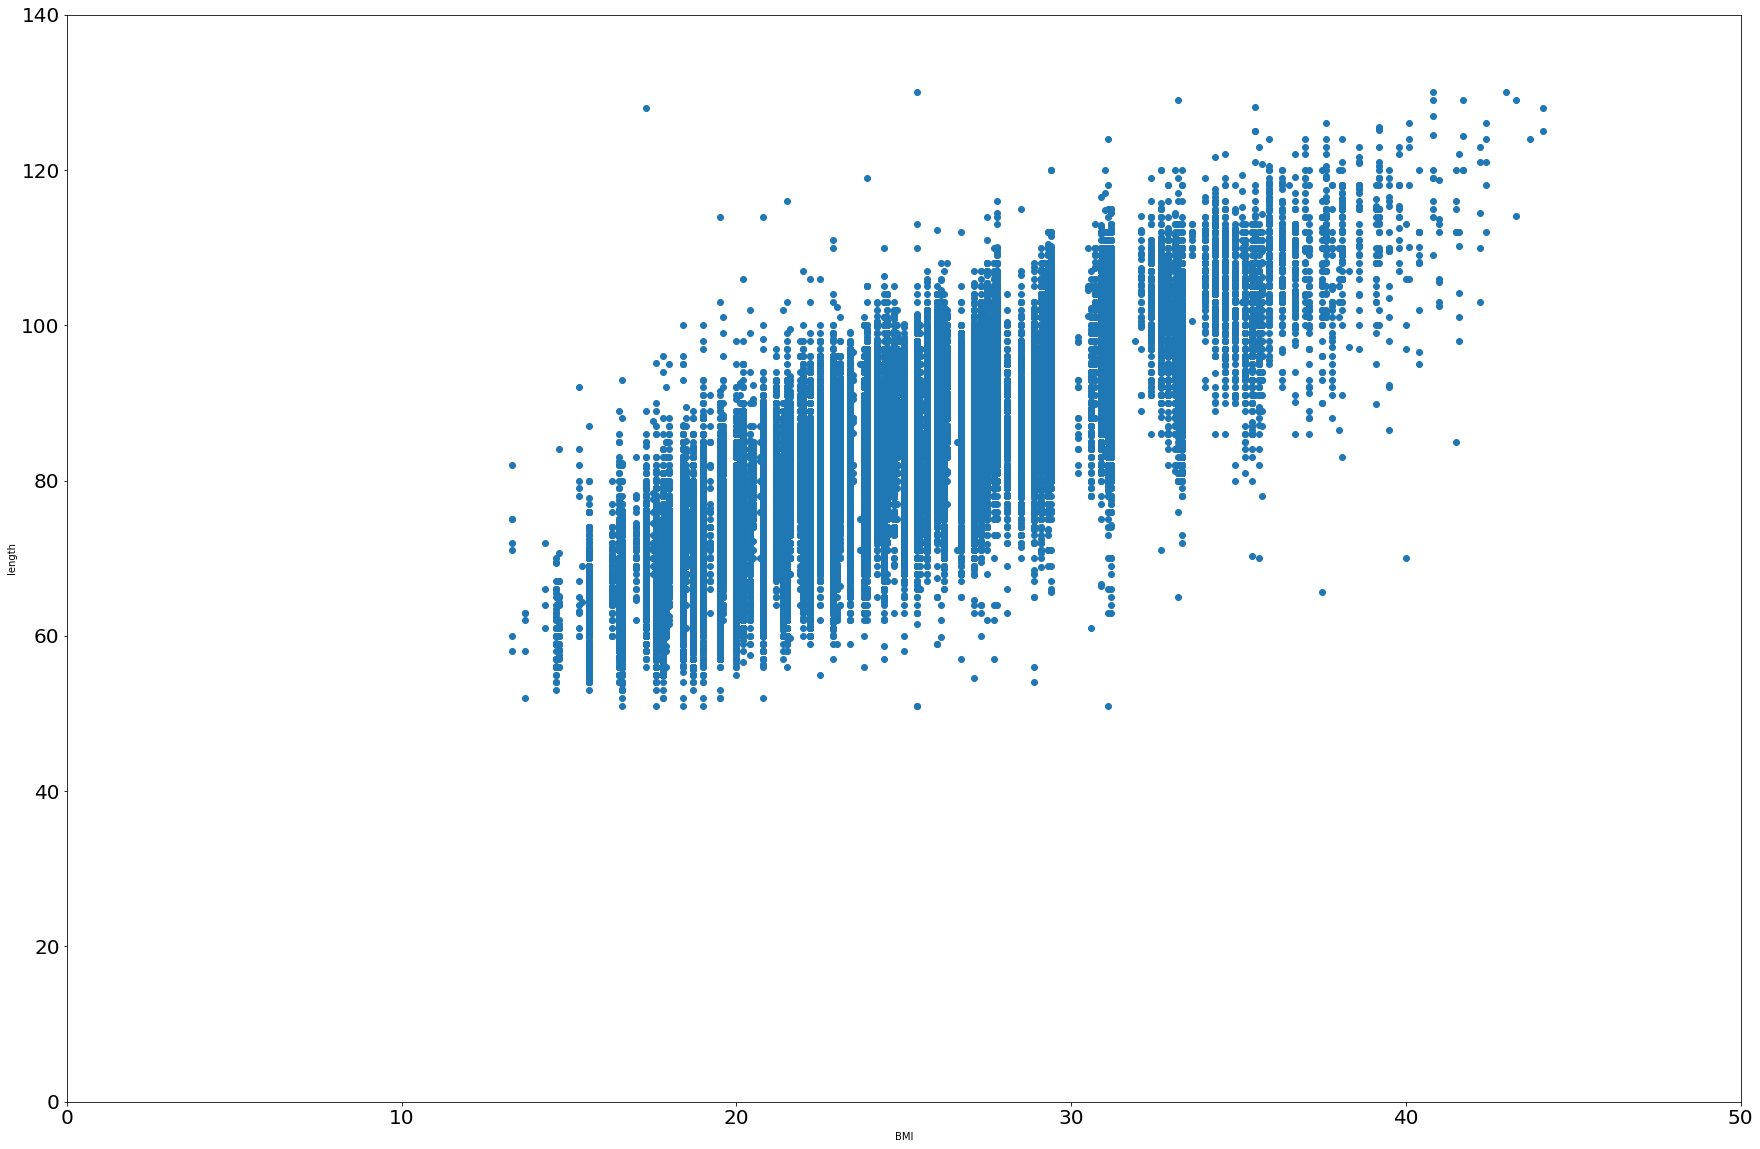

In [13]:

new_dataset = new_dataset[(new_dataset['허리둘레'] <=130) & (new_dataset['허리둘레'] >=40)] #40이하 값 제거
#8번
#BMI(5)와 허리둘레(20)의 관계를 산포도로 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(30,20))
plt.scatter(new_dataset['BMI'],new_dataset['허리둘레'], marker='o')
plt.xlabel('BMI')
plt.ylabel('length')
plt.ylim(0, 140)
plt.xlim(0,50)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()